In [4]:
from google.colab import drive

In [6]:
!mkdir -p /content/drive

shell-init: error retrieving current directory: getcwd: cannot access parent directories: No such file or directory


In [7]:
drive.mount('/content/drive')

Mounted at /content/drive


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from plotly.subplots import make_subplots
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_validate
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import confusion_matrix, roc_auc_score
from sklearn.model_selection import StratifiedKFold
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import VotingClassifier
from sklearn.ensemble import StackingClassifier

%matplotlib inline
import datetime as dt
import warnings
warnings.filterwarnings('ignore')

In [9]:
df = pd.read_csv('/content/drive/MyDrive/Motor_Vehicle_Collisions_-_Crashes.csv')

In [11]:
df.head()

,CRASH DATE,CRASH TIME,BOROUGH,ZIP CODE,LATITUDE,LONGITUDE,LOCATION,ON STREET NAME,CROSS STREET NAME,OFF STREET NAME,...,CONTRIBUTING FACTOR VEHICLE 2,CONTRIBUTING FACTOR VEHICLE 3,CONTRIBUTING FACTOR VEHICLE 4,CONTRIBUTING FACTOR VEHICLE 5,COLLISION_ID,VEHICLE TYPE CODE 1,VEHICLE TYPE CODE 2,VEHICLE TYPE CODE 3,VEHICLE TYPE CODE 4,VEHICLE TYPE CODE 5
0,09/11/2021,2:39,NaN,NaN,NaN,NaN,NaN,WHITESTONE EXPRESSWAY,20 AVENUE,NaN,...,Unspecified,NaN,NaN,NaN,4455765,Sedan,Sedan,NaN,NaN,NaN
1,03/26/2022,11:45,NaN,NaN,NaN,NaN,NaN,QUEENSBORO BRIDGE UPPER,NaN,NaN,...,NaN,NaN,NaN,NaN,4513547,Sedan,NaN,NaN,NaN,NaN
2,06/29/2022,6:55,NaN,NaN,NaN,NaN,NaN,THROGS NECK BRIDGE,NaN,NaN,...,Unspecified,NaN,NaN,NaN,4541903,Sedan,Pick-up Truck,NaN,NaN,NaN
3,09/11/2021,9:35,BROOKLYN,11208.0,40.667202,-73.866500,"(40.667202, -73.8665)",NaN,NaN,1211 LORING AVENUE,...,NaN,NaN,NaN,NaN,4456314,Sedan,NaN,NaN,NaN,NaN
4,12/14/2021,8:13,BROOKLYN,11233.0,40.683304,-73.917274,"(40.683304, -73.917274)",SARATOGA AVENUE,DECATUR STREET,NaN,...,NaN,NaN,NaN,NaN,4486609,NaN,NaN,NaN,NaN,NaN


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2040520 entries, 0 to 2040519
Data columns (total 29 columns):
 #   Column                         Dtype  
---  ------                         -----  
 0   CRASH DATE                     object 
 1   CRASH TIME                     object 
 2   BOROUGH                        object 
 3   ZIP CODE                       object 
 4   LATITUDE                       float64
 5   LONGITUDE                      float64
 6   LOCATION                       object 
 7   ON STREET NAME                 object 
 8   CROSS STREET NAME              object 
 9   OFF STREET NAME                object 
 10  NUMBER OF PERSONS INJURED      float64
 11  NUMBER OF PERSONS KILLED       float64
 12  NUMBER OF PEDESTRIANS INJURED  int64  
 13  NUMBER OF PEDESTRIANS KILLED   int64  
 14  NUMBER OF CYCLIST INJURED      int64  
 15  NUMBER OF CYCLIST KILLED       int64  
 16  NUMBER OF MOTORIST INJURED     int64  
 17  NUMBER OF MOTORIST KILLED      int64  
 18  CO

In [13]:
df.describe()

,LATITUDE,LONGITUDE,NUMBER OF PERSONS INJURED,NUMBER OF PERSONS KILLED,NUMBER OF PEDESTRIANS INJURED,NUMBER OF PEDESTRIANS KILLED,NUMBER OF CYCLIST INJURED,NUMBER OF CYCLIST KILLED,NUMBER OF MOTORIST INJURED,NUMBER OF MOTORIST KILLED,COLLISION_ID
count,1.809147e+06,1.809147e+06,2.040502e+06,2.040489e+06,2.040520e+06,2.040520e+06,2.040520e+06,2.040520e+06,2.040520e+06,2.040520e+06,2.040520e+06
mean,4.062768e+01,-7.375213e+01,3.055140e-01,1.463865e-03,5.560690e-02,7.297160e-04,2.654274e-02,1.132064e-04,2.199572e-01,5.993570e-04,3.133369e+06
std,1.981418e+00,3.726982e+00,6.962762e-01,4.029204e-02,2.422130e-01,2.748905e-02,1.627335e-01,1.068522e-02,6.573417e-01,2.667798e-02,1.504406e+06
min,0.000000e+00,-2.013600e+02,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,2.200000e+01
25%,4.066790e+01,-7.397492e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,3.146250e+06
50%,4.072095e+01,-7.392731e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,3.656490e+06
75%,4.076959e+01,-7.386673e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,4.166866e+06
max,4.334444e+01,0.000000e+00,4.300000e+01,8.000000e+00,2.700000e+01,6.000000e+00,4.000000e+00,2.000000e+00,4.300000e+01,5.000000e+00,4.677341e+06


In [14]:
df.isna().sum()

CRASH DATE                             0
CRASH TIME                             0
BOROUGH                           634796
ZIP CODE                          635038
LATITUDE                          231373
LONGITUDE                         231373
LOCATION                          231373
ON STREET NAME                    430946
CROSS STREET NAME                 766764
OFF STREET NAME                  1701947
NUMBER OF PERSONS INJURED             18
NUMBER OF PERSONS KILLED              31
NUMBER OF PEDESTRIANS INJURED          0
NUMBER OF PEDESTRIANS KILLED           0
NUMBER OF CYCLIST INJURED              0
NUMBER OF CYCLIST KILLED               0
NUMBER OF MOTORIST INJURED             0
NUMBER OF MOTORIST KILLED              0
CONTRIBUTING FACTOR VEHICLE 1       6506
CONTRIBUTING FACTOR VEHICLE 2     312991
CONTRIBUTING FACTOR VEHICLE 3    1895387
CONTRIBUTING FACTOR VEHICLE 4    2007896
CONTRIBUTING FACTOR VEHICLE 5    2031685
COLLISION_ID                           0
VEHICLE TYPE COD

In [15]:
cols = ['VEHICLE TYPE CODE 2', 'VEHICLE TYPE CODE 3', 'VEHICLE TYPE CODE 4', 'VEHICLE TYPE CODE 5', 'CONTRIBUTING FACTOR VEHICLE 2',\
        'CONTRIBUTING FACTOR VEHICLE 3', 'CONTRIBUTING FACTOR VEHICLE 4', 'CONTRIBUTING FACTOR VEHICLE 5',\
        'OFF STREET NAME', 'CROSS STREET NAME', 'ZIP CODE']
df.drop(cols, axis='columns', inplace= True)

In [16]:
df.dropna(subset=('CONTRIBUTING FACTOR VEHICLE 1'), inplace= True)

In [17]:
df['NUMBER OF PERSONS INJURED'].fillna(0, inplace=True)
df['NUMBER OF PERSONS KILLED'].fillna(0, inplace=True)

In [18]:
df.isna().sum()

CRASH DATE                            0
CRASH TIME                            0
BOROUGH                          633294
LATITUDE                         230776
LONGITUDE                        230776
LOCATION                         230776
ON STREET NAME                   429353
NUMBER OF PERSONS INJURED             0
NUMBER OF PERSONS KILLED              0
NUMBER OF PEDESTRIANS INJURED         0
NUMBER OF PEDESTRIANS KILLED          0
NUMBER OF CYCLIST INJURED             0
NUMBER OF CYCLIST KILLED              0
NUMBER OF MOTORIST INJURED            0
NUMBER OF MOTORIST KILLED             0
CONTRIBUTING FACTOR VEHICLE 1         0
COLLISION_ID                          0
VEHICLE TYPE CODE 1                9261
dtype: int64

In [19]:
df['CRASH DATE'] = pd.to_datetime(df['CRASH DATE'])
df['YEAR'] = df['CRASH DATE'].dt.year
df['MONTH'] = df['CRASH DATE'].dt.month

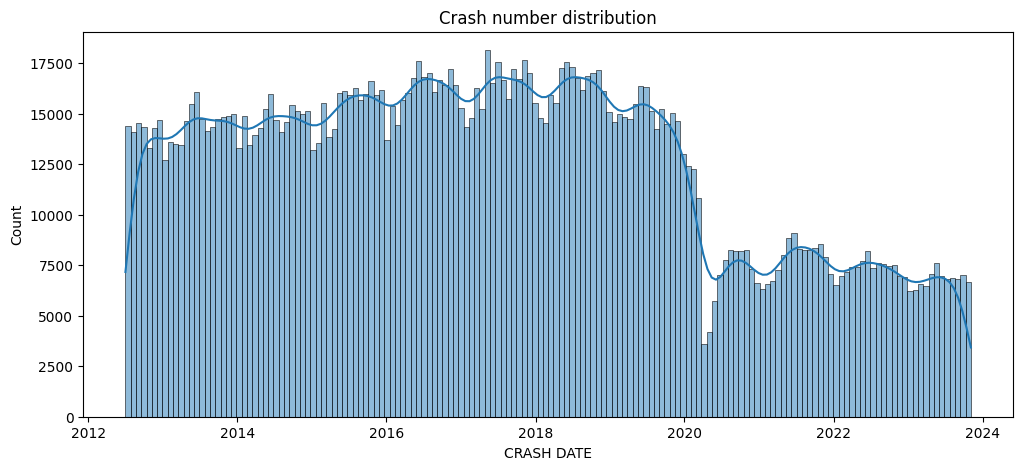

In [20]:
plt.subplots(figsize= (12, 5))
plt.title('Crash number distribution')
sns.histplot(df, x=df['CRASH DATE'],
            kde= True)
plt.show()

<Axes: title={'center': 'Correlation analysis'}>

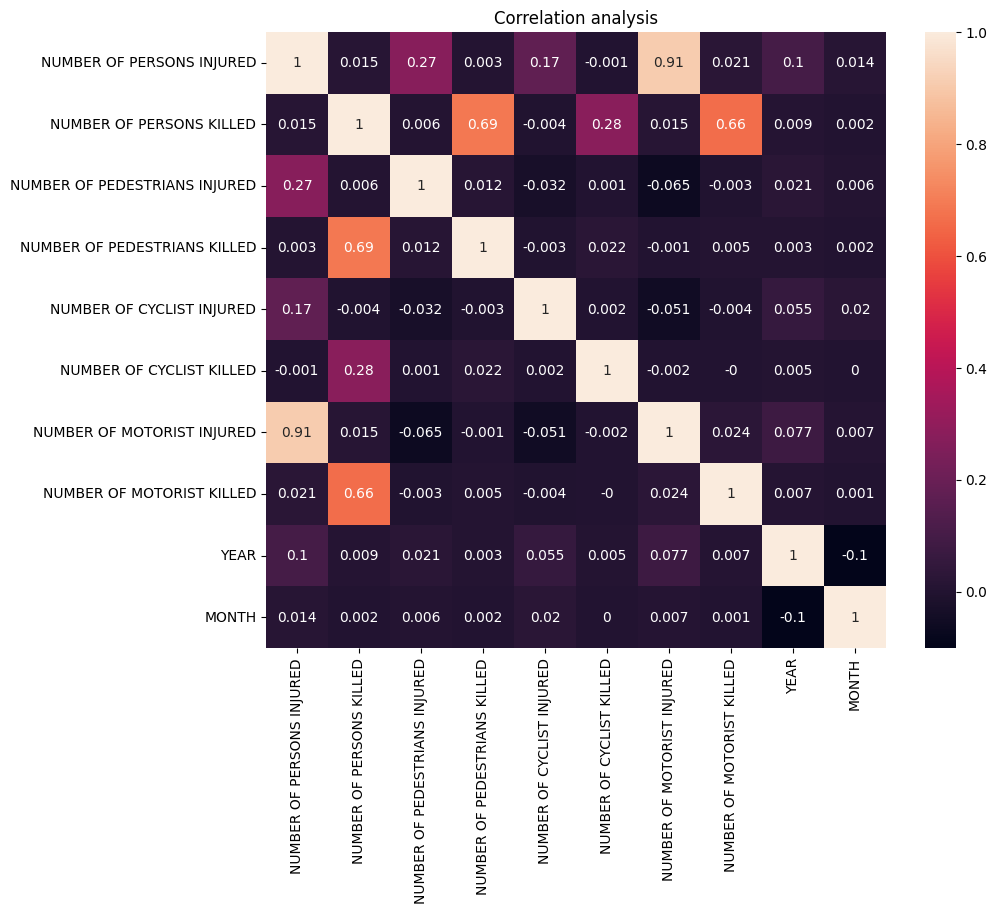

In [21]:
corr = df.select_dtypes('number').drop(['LATITUDE', 'LONGITUDE', 'COLLISION_ID'], axis=1).corr().round(3)

plt.subplots(figsize= (10, 8))
plt.title('Correlation analysis')
sns.heatmap(corr, annot= True)

In [22]:
grouped_df = df.groupby('YEAR')[[
    'NUMBER OF PERSONS KILLED', 'NUMBER OF PEDESTRIANS KILLED', 'NUMBER OF MOTORIST KILLED', 'NUMBER OF CYCLIST KILLED',
    'NUMBER OF PERSONS INJURED', 'NUMBER OF PEDESTRIANS INJURED', 'NUMBER OF MOTORIST INJURED',  'NUMBER OF CYCLIST INJURED']].sum().reset_index()
fig = px.bar(grouped_df, x='YEAR', y= ['NUMBER OF PEDESTRIANS KILLED', 'NUMBER OF MOTORIST KILLED', 'NUMBER OF CYCLIST KILLED'],
              text_auto=True,
              title='Number of killed people',
              template='seaborn',
              width = 900)
fig.update_layout(legend_title_text = 'Number of Persons killed')

fig.show()

In [23]:
fig = px.bar(grouped_df, x='YEAR', y= ['NUMBER OF PEDESTRIANS KILLED', 'NUMBER OF MOTORIST KILLED', 'NUMBER OF CYCLIST KILLED'],
              text_auto=True,
              title='Number of killed people',
              template='seaborn',
              width = 900)
fig.update_layout(legend_title_text = 'Number of Persons killed')

fig.show()

In [24]:
fig = px.bar(grouped_df, x='YEAR', y= ['NUMBER OF PEDESTRIANS INJURED', 'NUMBER OF MOTORIST INJURED',  'NUMBER OF CYCLIST INJURED'],
              text_auto=True,
              title='Number of injured people',
              template='seaborn',
              width = 900)
fig.update_layout(legend_title_text = 'Number of Persons injured')

fig.show()

In [25]:
df_factor = df.loc[df['CONTRIBUTING FACTOR VEHICLE 1'] != 'Unspecified']['CONTRIBUTING FACTOR VEHICLE 1'].value_counts()[:12].reset_index()
fig = px.pie(df_factor, df_factor['CONTRIBUTING FACTOR VEHICLE 1'], df_factor['count'],
             title= 'Top-12 factors of car crash',
             width=900, height=600)


fig.show()

In [26]:
df

,CRASH DATE,CRASH TIME,BOROUGH,LATITUDE,LONGITUDE,LOCATION,ON STREET NAME,NUMBER OF PERSONS INJURED,NUMBER OF PERSONS KILLED,NUMBER OF PEDESTRIANS INJURED,NUMBER OF PEDESTRIANS KILLED,NUMBER OF CYCLIST INJURED,NUMBER OF CYCLIST KILLED,NUMBER OF MOTORIST INJURED,NUMBER OF MOTORIST KILLED,CONTRIBUTING FACTOR VEHICLE 1,COLLISION_ID,VEHICLE TYPE CODE 1,YEAR,MONTH
0,2021-09-11,2:39,NaN,NaN,NaN,NaN,WHITESTONE EXPRESSWAY,2.0,0.0,0,0,0,0,2,0,Aggressive Driving/Road Rage,4455765,Sedan,2021,9
1,2022-03-26,11:45,NaN,NaN,NaN,NaN,QUEENSBORO BRIDGE UPPER,1.0,0.0,0,0,0,0,1,0,Pavement Slippery,4513547,Sedan,2022,3
2,2022-06-29,6:55,NaN,NaN,NaN,NaN,THROGS NECK BRIDGE,0.0,0.0,0,0,0,0,0,0,Following Too Closely,4541903,Sedan,2022,6
3,2021-09-11,9:35,BROOKLYN,40.667202,-73.866500,"(40.667202, -73.8665)",NaN,0.0,0.0,0,0,0,0,0,0,Unspecified,4456314,Sedan,2021,9
5,2021-04-14,12:47,NaN,NaN,NaN,NaN,MAJOR DEEGAN EXPRESSWAY RAMP,0.0,0.0,0,0,0,0,0,0,Unspecified,4407458,Dump,2021,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2040515,2023-07-03,18:05,NaN,40.866806,-73.931010,"(40.866806, -73.93101)",RIVERSIDE DRIVE,0.0,0.0,0,0,0,0,0,0,Turning Improperly,4648110,Sedan,2023,7
2040516,2023-07-22,21:39,BRONX,40.844177,-73.902920,"(40.844177, -73.90292)",EAST 174 STREET,1.0,0.0,1,0,0,0,0,0,Unspecified,4648117,Sedan,2023,7
2040517,2023-07-02,17:55,MANHATTAN,40.711033,-74.014540,"(40.711033, -74.01454)",WEST STREET,0.0,0.0,0,0,0,0,0,0,Driver Inattention/Distraction,4648366,Taxi,2023,7
2040518,2023-07-22,13:15,QUEENS,40.691580,-73.793190,"(40.69158, -73.79319)",110 AVENUE,1.0,0.0,0,0,0,0,0,0,Driver Inattention/Distraction,4648129,Station Wagon/Sport Utility Vehicle,2023,7


In [27]:
df.isna().sum()

CRASH DATE                            0
CRASH TIME                            0
BOROUGH                          633294
LATITUDE                         230776
LONGITUDE                        230776
LOCATION                         230776
ON STREET NAME                   429353
NUMBER OF PERSONS INJURED             0
NUMBER OF PERSONS KILLED              0
NUMBER OF PEDESTRIANS INJURED         0
NUMBER OF PEDESTRIANS KILLED          0
NUMBER OF CYCLIST INJURED             0
NUMBER OF CYCLIST KILLED              0
NUMBER OF MOTORIST INJURED            0
NUMBER OF MOTORIST KILLED             0
CONTRIBUTING FACTOR VEHICLE 1         0
COLLISION_ID                          0
VEHICLE TYPE CODE 1                9261
YEAR                                  0
MONTH                                 0
dtype: int64

In [28]:
columns_to_drop = ['CRASH DATE', 'CRASH TIME', 'LATITUDE', 'LONGITUDE', 'LOCATION', 'COLLISION_ID', 'YEAR', 'MONTH']
df_selected = df.drop(columns=columns_to_drop, inplace=False)

In [29]:
df_selected

,BOROUGH,ON STREET NAME,NUMBER OF PERSONS INJURED,NUMBER OF PERSONS KILLED,NUMBER OF PEDESTRIANS INJURED,NUMBER OF PEDESTRIANS KILLED,NUMBER OF CYCLIST INJURED,NUMBER OF CYCLIST KILLED,NUMBER OF MOTORIST INJURED,NUMBER OF MOTORIST KILLED,CONTRIBUTING FACTOR VEHICLE 1,VEHICLE TYPE CODE 1
0,NaN,WHITESTONE EXPRESSWAY,2.0,0.0,0,0,0,0,2,0,Aggressive Driving/Road Rage,Sedan
1,NaN,QUEENSBORO BRIDGE UPPER,1.0,0.0,0,0,0,0,1,0,Pavement Slippery,Sedan
2,NaN,THROGS NECK BRIDGE,0.0,0.0,0,0,0,0,0,0,Following Too Closely,Sedan
3,BROOKLYN,NaN,0.0,0.0,0,0,0,0,0,0,Unspecified,Sedan
5,NaN,MAJOR DEEGAN EXPRESSWAY RAMP,0.0,0.0,0,0,0,0,0,0,Unspecified,Dump
...,...,...,...,...,...,...,...,...,...,...,...,...
2040515,NaN,RIVERSIDE DRIVE,0.0,0.0,0,0,0,0,0,0,Turning Improperly,Sedan
2040516,BRONX,EAST 174 STREET,1.0,0.0,1,0,0,0,0,0,Unspecified,Sedan
2040517,MANHATTAN,WEST STREET,0.0,0.0,0,0,0,0,0,0,Driver Inattention/Distraction,Taxi
2040518,QUEENS,110 AVENUE,1.0,0.0,0,0,0,0,0,0,Driver Inattention/Distraction,Station Wagon/Sport Utility Vehicle


In [30]:
columns_with_null = ['BOROUGH', 'ON STREET NAME', 'VEHICLE TYPE CODE 1']
df_selected.dropna(subset=columns_with_null, inplace=True)

In [31]:
def determine_target(row):
    if any(row[col] >= 1 for col in row.index if 'INJURED' in col):
        return 1
    elif any(row[col] >= 1 for col in row.index if 'KILLED' in col):
        return 2
    elif any(row[col] >= 1 for col in row.index if 'INJURED' in col) and any(row[col] >= 1 for col in row.index if 'KILLED' in col):
        return 3
    else:
        return 0

df_selected['TARGET'] = df_selected.apply(determine_target, axis=1)

In [32]:
df_selected

,BOROUGH,ON STREET NAME,NUMBER OF PERSONS INJURED,NUMBER OF PERSONS KILLED,NUMBER OF PEDESTRIANS INJURED,NUMBER OF PEDESTRIANS KILLED,NUMBER OF CYCLIST INJURED,NUMBER OF CYCLIST KILLED,NUMBER OF MOTORIST INJURED,NUMBER OF MOTORIST KILLED,CONTRIBUTING FACTOR VEHICLE 1,VEHICLE TYPE CODE 1,TARGET
9,MANHATTAN,3 AVENUE,0.0,0.0,0,0,0,0,0,0,Passing Too Closely,Sedan,0
11,QUEENS,SPRINGFIELD BOULEVARD,0.0,0.0,0,0,0,0,0,0,Turning Improperly,Sedan,0
14,QUEENS,NORTH CONDUIT AVENUE,2.0,0.0,0,0,0,0,2,0,Reaction to Uninvolved Vehicle,Sedan,1
18,BRONX,WEST KINGSBRIDGE ROAD,1.0,0.0,0,0,0,0,1,0,Unspecified,Station Wagon/Sport Utility Vehicle,1
22,QUEENS,82 STREET,0.0,0.0,0,0,0,0,0,0,Unspecified,Sedan,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2040510,BROOKLYN,KENT AVENUE,1.0,0.0,0,0,1,0,0,0,Passing Too Closely,Bike,1
2040516,BRONX,EAST 174 STREET,1.0,0.0,1,0,0,0,0,0,Unspecified,Sedan,1
2040517,MANHATTAN,WEST STREET,0.0,0.0,0,0,0,0,0,0,Driver Inattention/Distraction,Taxi,0
2040518,QUEENS,110 AVENUE,1.0,0.0,0,0,0,0,0,0,Driver Inattention/Distraction,Station Wagon/Sport Utility Vehicle,1


In [33]:
df_selected = df_selected[['BOROUGH','ON STREET NAME','CONTRIBUTING FACTOR VEHICLE 1','VEHICLE TYPE CODE 1','TARGET']]

In [34]:
label_encoder = LabelEncoder()

for column in ['BOROUGH', 'ON STREET NAME', 'CONTRIBUTING FACTOR VEHICLE 1', 'VEHICLE TYPE CODE 1']:
    df_selected[column] = label_encoder.fit_transform(df_selected[column])

In [35]:
df_selected

,BOROUGH,ON STREET NAME,CONTRIBUTING FACTOR VEHICLE 1,VEHICLE TYPE CODE 1,TARGET
9,2,1051,36,543,0
11,3,10820,53,543,0
14,3,8972,44,543,1
18,0,12685,56,556,1
22,3,1846,56,543,0
...,...,...,...,...,...
2040510,1,7507,36,76,1
2040516,0,5119,56,543,1
2040517,2,12698,11,599,0
2040518,3,115,11,556,1


In [36]:
X = df_selected.drop(['TARGET'],axis=1)
y = df_selected['TARGET']

In [37]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

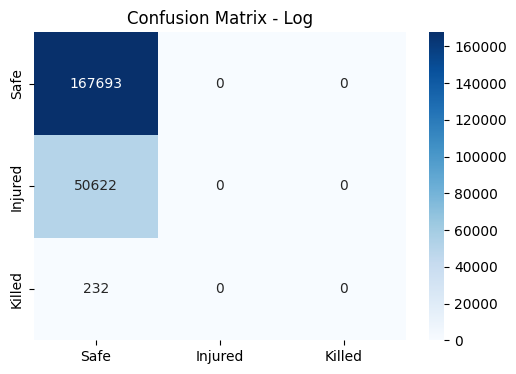

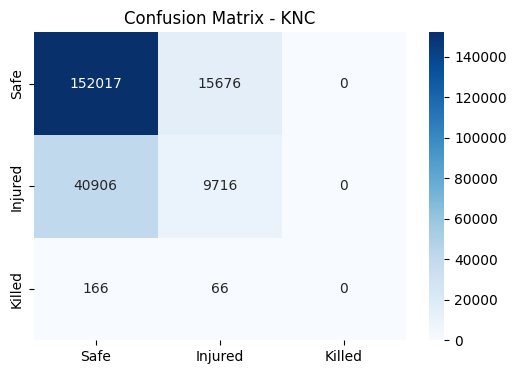

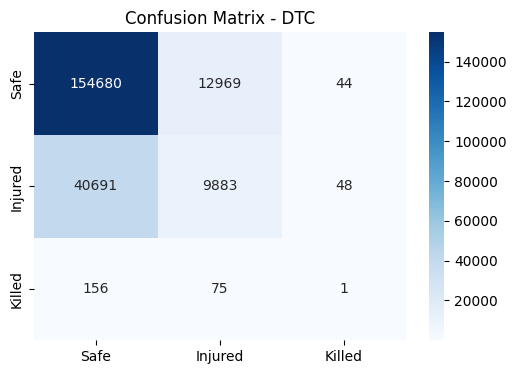

  Model  Accuracy      RMSE       MSE  R2 Score   ROC AUC
0   Log  0.766422  0.485671  0.235876  0.767309  0.529597
1   KNC  0.739762  0.512095  0.262241  0.740038  0.571985
2   DTC  0.749744  0.499754  0.249754  0.752991  0.578487


In [38]:
results_df = pd.DataFrame(columns=['Model', 'Accuracy', 'RMSE', 'MSE', 'R2 Score', 'ROC AUC'])
results_list = []
models = []
models.append(("Log", LogisticRegression()))
models.append(("KNC", KNeighborsClassifier()))
models.append(("DTC", DecisionTreeClassifier()))

for name, model in models:
    kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=43)
    scores = cross_validate(model, X_train, y_train, cv=kfold, scoring=['accuracy'], return_train_score=False)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    rmse = mean_squared_error(y_test, y_pred, squared=False)
    mse = mean_squared_error(y_test, y_pred)
    r2_score = model.score(X_test, y_test)
    roc_auc = roc_auc_score(y_test, model.predict_proba(X_test), multi_class='ovr')
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=['Safe', 'Injured', 'Killed'], yticklabels=['Safe', 'Injured', 'Killed'])
    plt.title(f'Confusion Matrix - {name}')
    plt.show()

    results_list.append({
        'Model': name,
        'Accuracy': scores['test_accuracy'].mean(),
        'RMSE': rmse,
        'MSE': mse,
        'R2 Score': r2_score,
        'ROC AUC': roc_auc
    })
results_df = pd.DataFrame(results_list)
print(results_df)

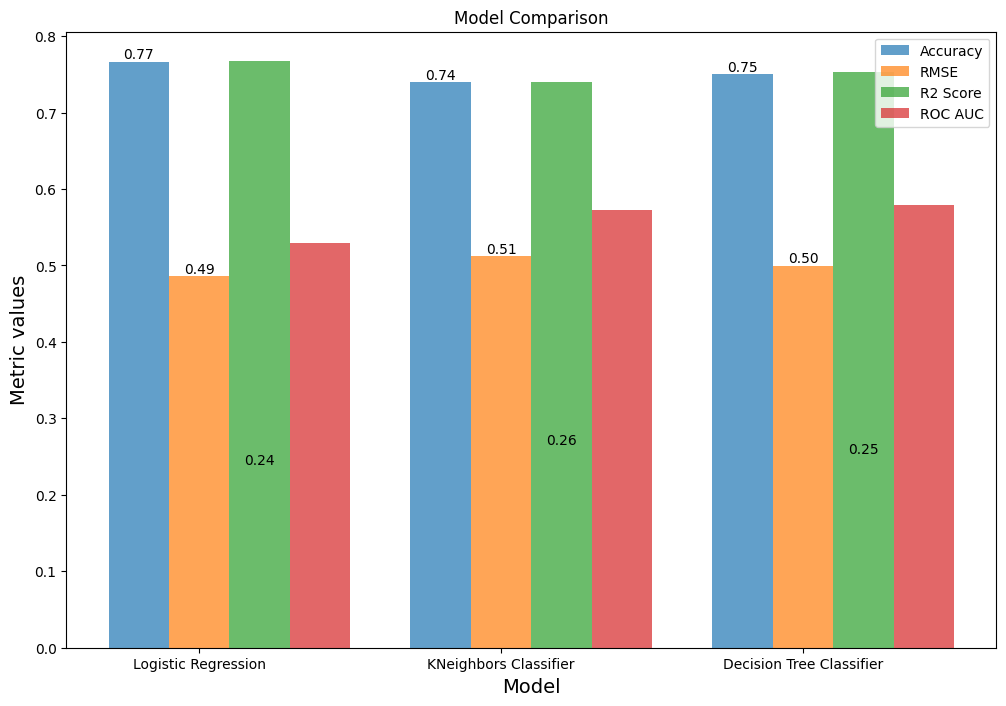

In [39]:
models = ['Logistic Regression','KNeighbors Classifier','Decision Tree Classifier']
metrics = ['Accuracy', 'RMSE', 'R2 Score', 'ROC AUC']

plt.figure(figsize=(12, 8))

bar_width = 0.2
index = np.arange(len(models))

for i, metric in enumerate(metrics):
    plt.bar(index + i * bar_width, results_df[metric], width=bar_width, label=metric, alpha=0.7)

for i, value in enumerate(results_df.values):
    for j, metric in enumerate(metrics):
        if j == 0:
            continue
        metric_value = float(value[j])
        plt.text(i + (j-1) * bar_width, metric_value, f'{metric_value:.2f}', ha='center', va='bottom')

plt.title('Model Comparison')
plt.xlabel('Model', fontsize=14)
plt.ylabel('Metric values', fontsize=14)
plt.xticks(index + bar_width, models)
plt.legend(metrics)

plt.show()

# Hyperparameter Tunning

In [40]:
log_param_grid = {'C': [0.001, 0.01, 0.1, 1, 10, 100]}

log_grid_search = GridSearchCV(LogisticRegression(), log_param_grid, cv=5, scoring='accuracy')
log_grid_search.fit(X_train, y_train)

best_log_model = log_grid_search.best_estimator_
best_log_params = log_grid_search.best_params_

best_log_accuracy = best_log_model.score(X_test, y_test)

print("Best Logistic Regression Model:")
print("Best Parameters:", best_log_params)
print("Accuracy:", best_log_accuracy)

Best Logistic Regression Model:
Best Parameters: {'C': 0.001}
Accuracy: 0.7673086338407756


In [41]:
knc_param_grid = {'n_neighbors': [3, 5, 7, 9],
                  'weights': ['uniform', 'distance'],
                  'p': [1, 2]}  # p=1 for Manhattan distance, p=2 for Euclidean distance

knc_grid_search = GridSearchCV(KNeighborsClassifier(), knc_param_grid, cv=5, scoring='accuracy')
knc_grid_search.fit(X_train, y_train)

best_knc_model = knc_grid_search.best_estimator_
best_knc_params = knc_grid_search.best_params_
best_knc_accuracy = best_knc_model.score(X_test, y_test)

print("Best KNeighbors Classifier Model:")
print("Best Parameters:", best_knc_params)
print("Accuracy:", best_knc_accuracy)

Best KNeighbors Classifier Model:
Best Parameters: {'n_neighbors': 9, 'p': 1, 'weights': 'uniform'}
Accuracy: 0.7567617034322137


In [42]:
dtc_param_grid = {'criterion': ['gini', 'entropy'],
                  'max_depth': [None, 10, 20, 30],
                  'min_samples_split': [2, 5, 10],
                  'min_samples_leaf': [1, 2, 4]}
dtc_grid_search = GridSearchCV(DecisionTreeClassifier(), dtc_param_grid, cv=5, scoring='accuracy')
dtc_grid_search.fit(X_train, y_train)

best_dtc_model = dtc_grid_search.best_estimator_
best_dtc_params = dtc_grid_search.best_params_
best_dtc_accuracy = best_dtc_model.score(X_test, y_test)

print("Best Decision Tree Classifier Model:")
print("Best Parameters:", best_dtc_params)
print("Accuracy:", best_dtc_accuracy)

Best Decision Tree Classifier Model:
Best Parameters: {'criterion': 'entropy', 'max_depth': 10, 'min_samples_leaf': 2, 'min_samples_split': 10}
Accuracy: 0.7787935775828541


## Ensemble Learning Techniques

In [43]:
voting_model = VotingClassifier(estimators=[
    ('logistic_regression', best_log_model),
    ('k_neighbors', best_knc_model),
    ('decision_tree', best_dtc_model)
], voting='hard')

voting_model.fit(X_train, y_train)
voting_accuracy = voting_model.score(X_test, y_test)

print("Voting Classifier Accuracy:", voting_accuracy)


Voting Classifier Accuracy: 0.7733714029476497


In [44]:
meta_model = LogisticRegression()
stacking_model = StackingClassifier(estimators=[
    ('logistic_regression', best_log_model),
    ('k_neighbors', best_knc_model),
    ('decision_tree', best_dtc_model)
], final_estimator=meta_model, cv=5)

stacking_model.fit(X_train, y_train)
stacking_accuracy = stacking_model.score(X_test, y_test)

print("Stacking Classifier Accuracy:", stacking_accuracy)


Stacking Classifier Accuracy: 0.7796355017456199


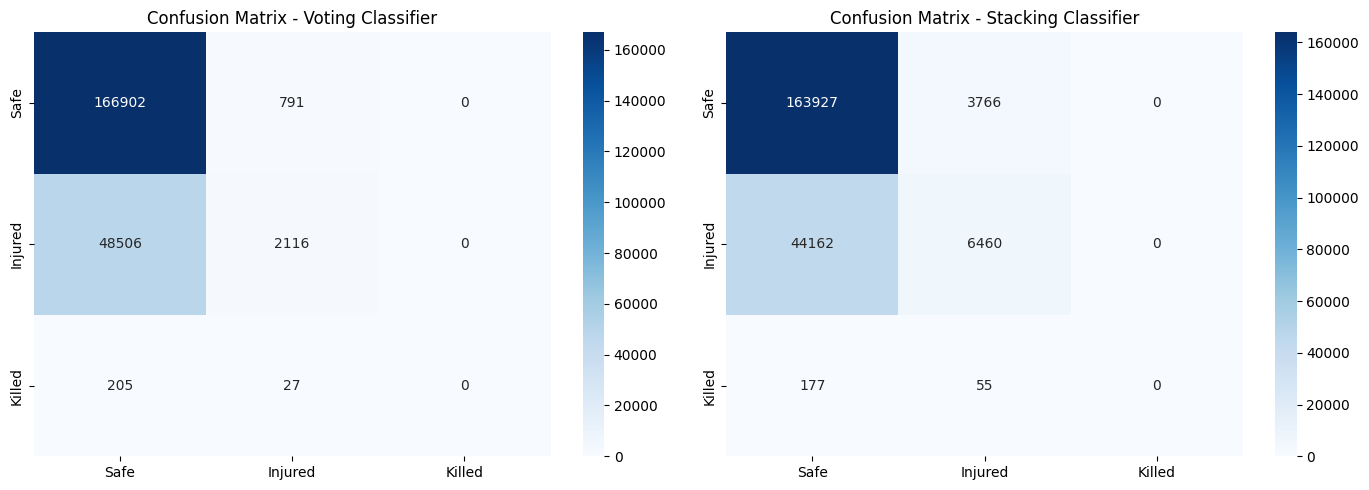

In [46]:
voting_pred = voting_model.predict(X_test)
stacking_pred = stacking_model.predict(X_test)
voting_cm = confusion_matrix(y_test, voting_pred)
stacking_cm = confusion_matrix(y_test, stacking_pred)
plt.figure(figsize=(14, 5))

plt.subplot(1, 2, 1)
sns.heatmap(voting_cm, annot=True, fmt="d", cmap="Blues", xticklabels=['Safe', 'Injured', 'Killed'], yticklabels=['Safe', 'Injured', 'Killed'])
plt.title('Confusion Matrix - Voting Classifier')

plt.subplot(1, 2, 2)
sns.heatmap(stacking_cm, annot=True, fmt="d", cmap="Blues", xticklabels=['Safe', 'Injured', 'Killed'], yticklabels=['Safe', 'Injured', 'Killed'])
plt.title('Confusion Matrix - Stacking Classifier')

plt.tight_layout()
plt.show()


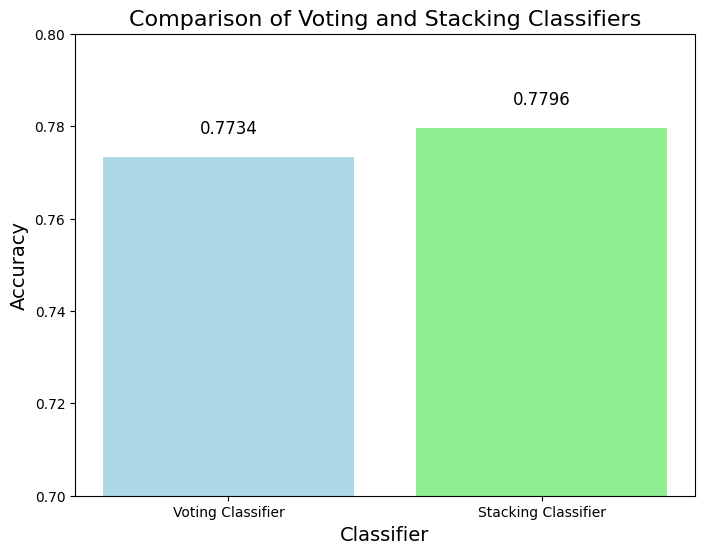

In [47]:
models = ['Voting Classifier', 'Stacking Classifier']
accuracies = [voting_accuracy, stacking_accuracy]

plt.figure(figsize=(8, 6))
plt.bar(models, accuracies, color=['lightblue', 'lightgreen'])
plt.xlabel('Classifier', fontsize=14)
plt.ylabel('Accuracy', fontsize=14)
plt.title('Comparison of Voting and Stacking Classifiers', fontsize=16)

for i, accuracy in enumerate(accuracies):
    plt.text(i, accuracy + 0.005, f'{accuracy:.4f}', ha='center', fontsize=12)

plt.ylim(0.7, 0.8)
plt.show()
